
#  Success rate of Routing Queries for Bing and Google map API


## running conditions: 
Take 2000 pairs of postcode (randomly selected postcode from databse of  City houses
Pair of postcode include 2 points start and end point for joinery (point A and Point B)
In order to figure out  API response in different time of day, running the code for : Day, Night 
Testing every 6 hours (Q1,Q2,Q3 and Q4)
3 tests per quarter (using for Standard deviation error SDT)
recorded results for: number of failed queries, corresponding postcode information, duration time for batch run
print sample of road segment information from Bing and Google CLoud (GC) 


In [18]:
#Import libraries

import pandas as pd
import random  #import randrange
import datetime as dt
#Googel API code
import googlemaps
import urllib
import numpy as np
import sys
from geopy import distance
import math
import urllib, json
import matplotlib.pylab as plt


In [19]:
headers= ['Q1_1','Q1_2','Q1_3','Q1_4','Q1_5','Q2_1','Q2_2','Q2_3','Q2_4','Q2_5']
# Bing API DataFrame
B_Df=pd.DataFrame(columns=['A','B']+headers)  #Start and end point of journey
B_Df_runtime=pd.DataFrame(columns=headers)

# Google API DataFrame
G_Df=pd.DataFrame(columns=['A','B']+headers)
G_Df_runtime=pd.DataFrame(columns=headers)

gKEY = ''# Insert your Google map API key 
bKEY = "" # Insert Bing map API 

folder=''# inset your databse directory 

In [ ]:
# =============================================================================
# #input and Data prep
# =============================================================================
dataset = pd.read_csv('/Users/postcodes.csv')# data set include active postcode
pcode=list(dataset['Postcode'])
a_b=np.random.choice(pcode,size=(int(len(pcode)/2)-1,2),replace=False)
B_Df['A']=a_b[:,0]
B_Df['B']=a_b[:,1]
G_Df['A']=a_b[:,0]
G_Df['B']=a_b[:,1]


In [ ]:
# =============================================================================
# Direction API 
# =============================================================================
#Bing API

def Bing_direction(start_point , end_point , datetime=dt.datetime.now(), mode="Driving"): #,timetype
    #making the url
    travelMode=mode
    start_point=urllib.parse.quote(start_point, safe='')
    end_point=urllib.parse.quote(end_point, safe='')
    datetime=urllib.parse.quote(str(datetime), safe='')    
    MyUrl = ('http://dev.virtualearth.net/REST/V1/Routes/'
            +travelMode+
            '?wp.0=%s'
            '&wp.1=%s'
            #'&timeType=%s'
            '&dateTime=%s'
            '&routePathOutput=Points' 
            '&tolerances=0.05'   
            '&key=%s') % (start_point, end_point,datetime, bKEY) 
    #grabbing the JSON result
    #print (MyUrl)
    response = urllib.request.urlopen(MyUrl)
    jsonRaw = response.read()
#    jsonData = json.loads(jsonRaw.decode())
#    trip_data=jsonData["resourceSets"][0]["resources"][0]#["routeLegs"][0]['itineraryItems']
#    return  jsonRaw

In [ ]:

# =============================================================================
# Direction API 
# =============================================================================
#  Google  API
#  alternative ways to use GC API
gmaps = googlemaps.Client(gKEY)

def Google_direction(start_point , end_point , datetime=dt.datetime.now() , mode="driving"):
    directions_result = gmaps.directions(start_point, end_point, mode="driving")#, departure_time=datetime)
    return directions_result

def G_direction(start_point , end_point , datetime=dt.datetime.now(), mode="Driving"): #,timetype
    #making the url
    travelMode=mode
    start_point=urllib.parse.quote(start_point, safe='')
    end_point=urllib.parse.quote(end_point, safe='')
    datetime=urllib.parse.quote(str(datetime), safe='') 
    MyUrl=("https://maps.googleapis.com/maps/api/directions/json?"
           +'origin=%s'
           +'&destination=%s'
           +'&key=%s') % (start_point, end_point, gKEY)
    #grabbing the JSON result
    #print (MyUrl)
    response = urllib.request.urlopen(MyUrl)
    jsonRaw = response.read()
#    jsonData = json.loads(jsonRaw.decode())
#    trip_data=jsonData["resourceSets"][0]["resources"][0]#["routeLegs"][0]['itineraryItems']
#    return  jsonRaw


In [ ]:
# =============================================================================
# Execute the code Q_n=1,2,3 and 4
# dump data in CSV format after each run
# =============================================================================
Q_n=2
#HH=2
n_postcode=len(a_b)

#Bing 
for h in headers[(Q_n-1)*5:Q_n*5]:#[HH:HH+1]:
    B_t_s=dt.datetime.now()
    for i in range (n_postcode):
        try :Bing_direction(a_b[i,0],a_b[i,1])
        except: B_Df.loc[i,h]=1
    B_Df_runtime.loc[0,h]=(dt.datetime.now()-B_t_s).total_seconds()

   
 #Google   
for h in headers[(Q_n-1)*5:Q_n*5]:#[HH:HH+1]:
    G_t_s=dt.datetime.now()
    G_direction(a_b[i,0],a_b[i,1])
    for i in range (n_postcode):
        try :G_direction(a_b[i,0],a_b[i,1])
        except: G_Df.loc[i,h]=1
    G_Df_runtime.loc[0,h]=(dt.datetime.now()-G_t_s).total_seconds()
    
    
G_Df.to_csv('Df_Google.csv', sep='\t', encoding='utf-8',index=False)
B_Df.to_csv('Df_Bing.csv', sep='\t', encoding='utf-8',index=False)

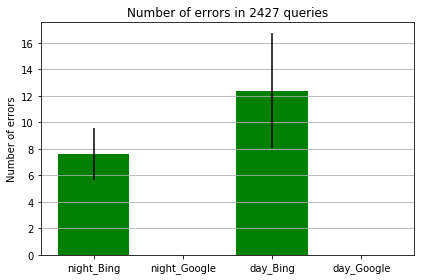

In [20]:
# =============================================================================
# # VISUALIZE ERRORS
### Error vs number of quersies 
# =============================================================================

G_Df=pd.read_csv('/Users/Df_Google.csv')
B_Df=pd.read_csv('/Users/Df_Bing.csv')

Bing_Q1=[B_Df['Q1_1'].sum(),B_Df['Q1_2'].sum(),B_Df['Q1_3'].sum(),B_Df['Q1_4'].sum(),B_Df['Q1_5'].sum()] #night run
Bing_Q2=[B_Df['Q2_1'].sum(),B_Df['Q2_2'].sum(),B_Df['Q2_3'].sum(),B_Df['Q2_4'].sum(),B_Df['Q2_5'].sum()] #day run

Google_Q1=[G_Df['Q1_1'].sum(),G_Df['Q1_2'].sum(),G_Df['Q1_3'].sum(),G_Df['Q1_4'].sum(),G_Df['Q1_5'].sum()]
Google_Q2=[G_Df['Q2_1'].sum(),G_Df['Q2_2'].sum(),G_Df['Q2_3'].sum(),G_Df['Q2_4'].sum(),G_Df['Q2_5'].sum()]

Bing_Q1_mean=np.mean(Bing_Q1)
Bing_Q2_mean=np.mean(Bing_Q2)
Google_Q1_mean=np.mean(Google_Q1)
Google_Q2_mean=np.mean(Google_Q2)

Bing_Q1_std=np.std(Bing_Q1)
Bing_Q2_std=np.std(Bing_Q2)
Google_Q1_std=np.std(Google_Q1)
Google_Q2_std=np.std(Google_Q2)

CTEs=[Bing_Q1_mean,Google_Q1_mean,Bing_Q2_mean,Google_Q2_mean]
error=[Bing_Q1_std,Google_Q1_std,Bing_Q2_std,Google_Q2_std]

x_pos=['night_Bing','night_Google','day_Bing','day_Google']
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error,color='green')
ax.set_ylabel('Number of errors')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)
ax.set_title('Number of errors in 2427 queries')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('number of errors.png', dpi=300)
plt.show()


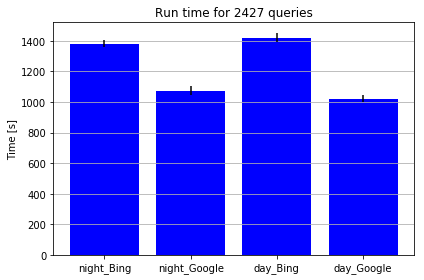

In [21]:
# =============================================================================
# # VISUALIZE ERRORS
### Run Time vs number of quersies 
# =============================================================================
Bq1=[1406,1365,1359,1397] #time [s]
Bq2=[1430,1404,1460,1390] #time [s]

Gq1=[1067,1029,1090,1107] #time [s]
Gq2=[1008,1057,998,1020]  #time [s]


Bq1_mean=np.mean(Bq1)
Bq2_mean=np.mean(Bq2)

Gq1_mean=np.mean(Gq1)
Gq2_mean=np.mean(Gq2)


Bq1_std=np.std(Bq1)
Bq2_std=np.std(Bq2)

Gq1_std=np.std(Gq1)
Gq2_std=np.std(Gq2)


CTEs_t=[Bq1_mean,Gq1_mean,Bq2_mean,Gq2_mean]
error_t=[Bq1_std,Gq1_std,Bq2_std,Gq2_std]


x1_pos=['night_Bing','night_Google','day_Bing','day_Google']
fig2, ax = plt.subplots()
ax.bar(x1_pos, CTEs_t, yerr=error_t,color='Blue')
ax.set_ylabel('Time [s]')
ax.set_xticks(x1_pos)
ax.set_xticklabels(x1_pos)
ax.set_title('Run time for 2427 queries')
ax.yaxis.grid(True)


# Save the figure and show

plt.tight_layout()
plt.savefig('Run time.png', dpi=300)
plt.show()